In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

In [4]:
# Load the dataset
df = pd.read_csv('Diabetes-Classification.csv')# Replace with your file path


In [5]:
# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (128, 11)

First 5 Rows:


,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20.0,Normal,80,5.0,No,No,Healthy,NaN,No


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values by dropping rows
df = df.dropna()


Missing Values:
Age                           0
Gender                        0
BMI                           3
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    2
Smoking                       2
Diet                          2
Exercise                      1
Diagnosis                     0
dtype: int64


In [7]:
# Check column names
print("\nColumn Names:")
print(df.columns)

# Preprocessing
# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise']
numerical_cols = ['Age', 'BMI', 'FBS', 'HbA1c']

# Target column
target_column = 'Diagnosis'


Column Names:
Index(['Age', 'Gender', 'BMI', 'Blood Pressure', 'FBS', 'HbA1c',
       'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise',
       'Diagnosis'],
      dtype='object')


In [8]:
# Create a ColumnTransformer to preprocess the data in the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [9]:
# Split features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Convert y_train and y_test to binary (label encoding)
y_train = y_train.map({'No': 0, 'Yes': 1}).values
y_test = y_test.map({'No': 0, 'Yes': 1}).values

In [11]:
# Convert X_train_scaled and X_test_scaled to NumPy arrays (Tensorflow does not accept pandas dataframe as input, it accepts either Tensorflow tensors or NumPy arrays)
X_train_scaled = X_train_scaled.astype('float32')
X_test_scaled = X_test_scaled.astype('float32')

In [12]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input

#suppress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Build the TensorFlow MLP model
tf_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


In [13]:
# Compile the model
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = tf_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 545ms/step - accuracy: 0.6356 - loss: 0.6347 - val_accuracy: 0.6471 - val_loss: 0.6321
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.7365 - loss: 0.5601 - val_accuracy: 0.6471 - val_loss: 0.6168
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7635 - loss: 0.5811 - val_accuracy: 0.6471 - val_loss: 0.6019
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7831 - loss: 0.5116 - val_accuracy: 0.6471 - val_loss: 0.5897
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7091 - loss: 0.5443 - val_accuracy: 0.6471 - val_loss: 0.5787
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7829 - loss: 0.4940 - val_accuracy: 0.6471 - val_loss: 0.5697
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7441 - loss: 0.4774 - val_accuracy: 0.6471 - val_loss: 0.5621
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7791 - loss: 0.4796 - val_accuracy: 0.6471 - val_loss:

In [14]:
# Evaluate the model
y_pred_tf = (tf_model.predict(X_test_scaled) > 0.5).astype(int)
print("\nTensorFlow MLP Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tf))
print("Classification Report:")
print(classification_report(y_test, y_pred_tf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tf))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step

TensorFlow MLP Performance:
Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        27
           1       1.00      0.56      0.71         9

    accuracy                           0.89        36
   macro avg       0.94      0.78      0.82        36
weighted avg       0.90      0.89      0.88        36

Confusion Matrix:
[[27  0]
 [ 4  5]]


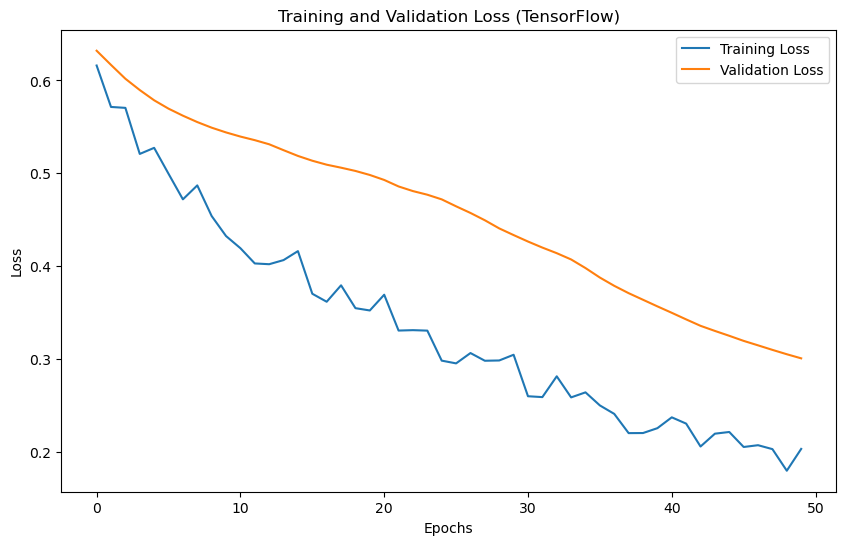

In [15]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (TensorFlow)')
plt.legend()
plt.show()

In [16]:
#Install PyTorch from here: https://pytorch.org/get-started/locally/ (select compute platform as cpu if you dont have a gpu or doesn't have gpu drivers installed)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [17]:
# Convert the Pandas Dataframe data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [18]:
# Build the PyTorch MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

In [19]:
# Initialize the model, loss function, and optimizer
input_size = X_train_scaled.shape[1]
torch_model = MLP(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(torch_model.parameters(), lr=0.001)

In [20]:
# Train the model
epochs = 50
train_losses, val_losses = [], []

for epoch in range(epochs):
    torch_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = torch_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    # Validation
    torch_model.eval()
    with torch.no_grad():
        val_outputs = torch_model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss.item()}")

Epoch 1/50, Loss: 0.7236892183621725, Val Loss: 0.7146482467651367
Epoch 2/50, Loss: 0.7023586432139078, Val Loss: 0.6981111168861389
Epoch 3/50, Loss: 0.692854126294454, Val Loss: 0.6826996207237244
Epoch 4/50, Loss: 0.6674546400705973, Val Loss: 0.6675388813018799
Epoch 5/50, Loss: 0.6608035167058309, Val Loss: 0.6524100303649902
Epoch 6/50, Loss: 0.6527020732561747, Val Loss: 0.6365320086479187
Epoch 7/50, Loss: 0.6369755268096924, Val Loss: 0.6196343898773193
Epoch 8/50, Loss: 0.6252460281054179, Val Loss: 0.6018491387367249
Epoch 9/50, Loss: 0.5927717288335165, Val Loss: 0.5831241011619568
Epoch 10/50, Loss: 0.5899089773495992, Val Loss: 0.563205897808075
Epoch 11/50, Loss: 0.5538547039031982, Val Loss: 0.5420992374420166
Epoch 12/50, Loss: 0.5284265478452047, Val Loss: 0.5204159021377563
Epoch 13/50, Loss: 0.5343850354353586, Val Loss: 0.49823951721191406
Epoch 14/50, Loss: 0.487451434135437, Val Loss: 0.4763096570968628
Epoch 15/50, Loss: 0.47392282883326214, Val Loss: 0.4544347

In [21]:
# Evaluate the model
torch_model.eval()
with torch.no_grad():
    y_pred_torch = (torch_model(X_test_tensor) > 0.5).float().numpy()

print("\nPyTorch MLP Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_torch))
print("Classification Report:")
print(classification_report(y_test, y_pred_torch))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_torch))



PyTorch MLP Performance:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[27  0]
 [ 0  9]]


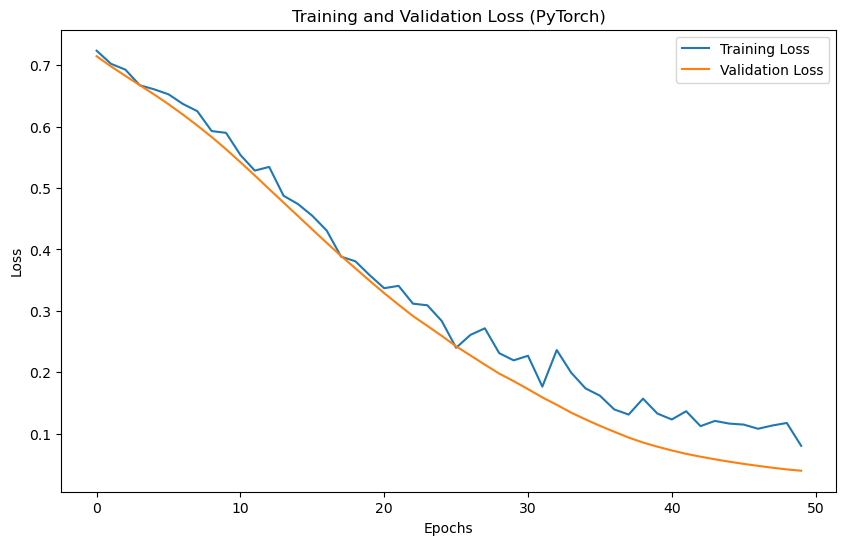

In [22]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (PyTorch)')
plt.legend()
plt.show()